# Causal Inference and Machine Learning: Conditioning Confounders


In [1]:
%matplotlib inline
from IPython.display import Image

In [2]:
import pandas as pd
from numpy.random import binomial, normal, seed
from numpy import mean
import numpy as np

seed(1234)
n = 10000

treatment = binomial(1, 0.5, size=n)
outcome = binomial(1, 0.3, size=n)*treatment + binomial(1, 0.5, size=n)*(1-treatment)

condition_prob_diff = mean(outcome[treatment==1]) - mean(outcome[treatment==0])
print(condition_prob_diff)



-0.1810218929047634


## Exercise A

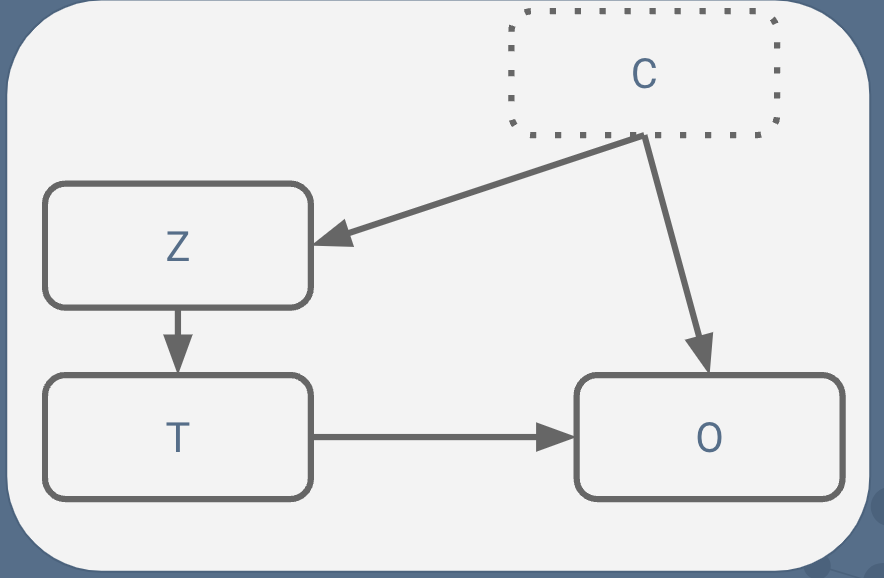

In [4]:
Image('graphs/graph1.png', width=500, height=300)

In [5]:
# C := B(0.8) 
# Z := B(0.6) C + B(0.1) (1-C)
# T := B(0.6) Z + B(0.2)(1-Z)
# O := B(0.3) T + B(0.5) (1-T) + C + 𝜀

seed(1234)
n = 10000

e = normal(0, 1, n)
c_var = binomial(1, 0.8, size=n)
z_var = binomial(1, 0.6, size=n)*c_var + binomial(1, 0.1, size=n)*(1-c_var)
treatment = binomial(1, 0.6, size=n)*z_var + binomial(1, 0.2, size=n)*(1-z_var)
outcome = binomial(1, 0.3, size=n)*treatment + binomial(1, 0.5, size=n)*(1-treatment) + c_var + e
df = pd.DataFrame({'C': c_var, 'Z': z_var, 'treatment': treatment, 'outcome': outcome})

condition_prob_diff = mean(outcome[treatment==1]) - mean(outcome[treatment==0])

# adjustment formula


p_z = np.array([mean(z_var==z) for z in np.unique(z_var)])
adjusted_formula_e0t1 = np.array([mean(outcome[(treatment==1) & (z_var==z)]) for z in np.unique(z_var)])
adjusted_formula_e0t0 = np.array([mean(outcome[(treatment==0) & (z_var==z)]) for z in np.unique(z_var)])

adjusted_formula = np.sum(p_z * (adjusted_formula_e0t1 - adjusted_formula_e0t0))

print(condition_prob_diff)
print(adjusted_formula)


display = pd.DataFrame({'Estimated E(O\|T=1) - E(O\|T=0) from data: ': condition_prob_diff,
'Adjustment(1) - Adjustment(0)': adjusted_formula,
'Theoretical ATE = E(O\|do(T=1)) - E(O\|do(T=0))': -0.2,
'Estimated ATE from data: ': adjusted_formula}, index=['Value']).transpose()

display

-0.05704740522570462
-0.19081935143403184


,Value
Estimated E(O\|T=1) - E(O\|T=0) from data:,-0.057047
Adjustment(1) - Adjustment(0),-0.190819
Theoretical ATE = E(O\|do(T=1)) - E(O\|do(T=0)),-0.200000
Estimated ATE from data:,-0.190819


adjusting for Z because of backdoor criterion. the adjustment formula clearly has less bias to the theoretical ATE.

## Exercise B

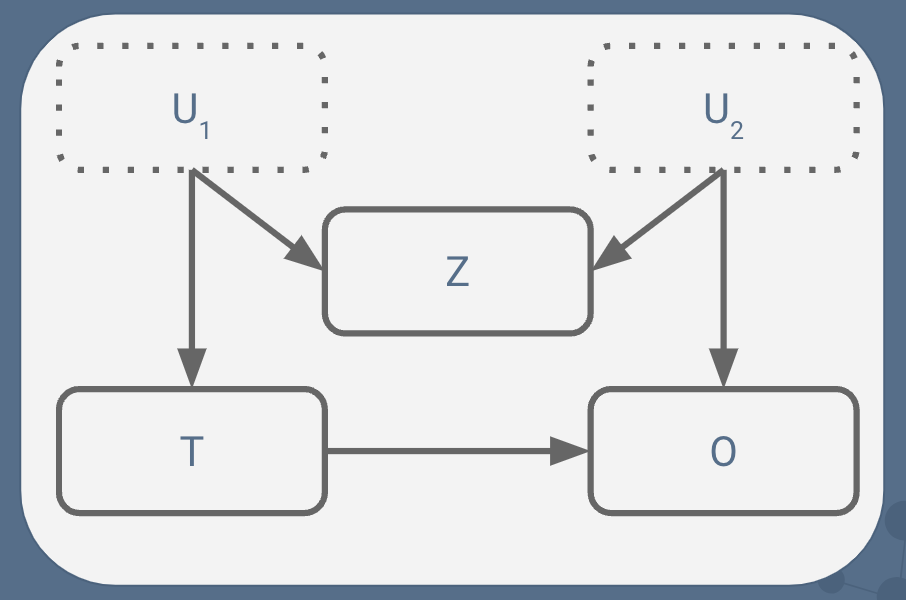

In [6]:
Image('graphs/graph2.png', width=500, height=300)

In [17]:
seed(1234)
n = 10000

# U1 := B(0.5)
# U2 := B(0.3)
# T := B(0.4)U1
# Z := B(0.8) U1 + B(0.8) U2
# O := B(0.4) T + U2 + 𝜀

U1 = binomial(1, .5, size=n)
U2 = binomial(1, .3, size=n)
z_var = binomial(1, 0.8, size=n)*U1 + binomial(1, 0.8, size=n)*(1-U2)
treatment = binomial(1,.4,size=n)*U1
outcome = binomial(1, 0.4, size=n)*treatment + U2 + e
df = pd.DataFrame({'U1': U1, 'U2': U2, 'treatment': treatment, 'Z':z_var, 'outcome': outcome})

condition_prob_diff = mean(outcome[treatment==1]) - mean(outcome[treatment==0])

p_z = np.array([mean(z_var==z) for z in np.unique(z_var)])
adjusted_formula_e0t1 = np.array([mean(outcome[(treatment==1) & (z_var==z)]) for z in np.unique(z_var)])
adjusted_formula_e0t0 = np.array([mean(outcome[(treatment==0) & (z_var==z)]) for z in np.unique(z_var)])

adjusted_formula = np.sum(p_z * (adjusted_formula_e0t1 - adjusted_formula_e0t0))

print(condition_prob_diff)
print(adjusted_formula)

display = pd.DataFrame({'Estimated E(O\|T=1) - E(O\|T=0) from data: ': condition_prob_diff,
'Adjustment(1) - Adjustment(0)': adjusted_formula,
'Theoretical ATE = E(O\|do(T=1)) - E(O\|do(T=0))': 0.4,
'Estimated ATE from data: ': condition_prob_diff}, index=['Value']).transpose()

display



0.4066830932279406
0.5912643145796482


,Value
Estimated E(O\|T=1) - E(O\|T=0) from data:,0.406683
Adjustment(1) - Adjustment(0),0.591264
Theoretical ATE = E(O\|do(T=1)) - E(O\|do(T=0)),0.400000
Estimated ATE from data:,0.406683


no adjustment needed here because Z does not confound T and the airway between T and O is open. 

## Exercise C

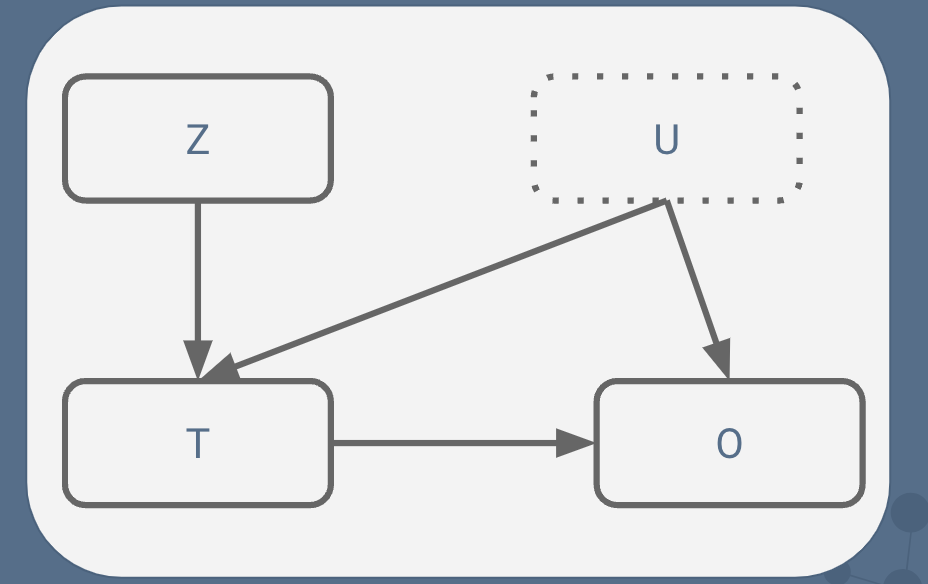

In [8]:
Image('graphs/graph3.png', width=500, height=300)

In [9]:
# U := B(0.4)
# Z := B(0.3)
# T := B(0.4) U Z+ B(0.7) (1 - Z)
# O := B(0.4) T + B(0.5) (1-T) + U + 𝜀


seed(1234)
n = 10000

e = normal(0, 1, n)
U = binomial(1, 0.4, size=n)
z_var = binomial(1, 0.3, size=n)
treatment = binomial(1, 0.4, size=n)*U*z_var + binomial(1, 0.7, size=n)*(1-z_var)
outcome = binomial(1, 0.4, size=n)*treatment + binomial(1, 0.5, size=n)*(1-treatment) + U + e
df = pd.DataFrame({'U': U, 'treatment': treatment, 'Z':z_var, 'outcome': outcome})

condition_prob_diff = mean(outcome[treatment==1]) - mean(outcome[treatment==0])
print(condition_prob_diff)

# adjustment formula

p_z = np.array([mean(z_var==z) for z in np.unique(z_var)])
adjusted_formula_e0t1 = np.array([mean(outcome[(treatment==1) & (z_var==z)]) for z in np.unique(z_var)])
adjusted_formula_e0t0 = np.array([mean(outcome[(treatment==0) & (z_var==z)]) for z in np.unique(z_var)])

adjusted_formula = np.sum(p_z * (adjusted_formula_e0t1 - adjusted_formula_e0t0))

print(condition_prob_diff)
print(adjusted_formula)

display = pd.DataFrame({'Estimated E(O\|T=1) - E(O\|T=0) from data: ': condition_prob_diff,
'Adjustment(1) - Adjustment(0)': adjusted_formula,
'Theoretical ATE = E(O\|do(T=1)) - E(O\|do(T=0))': -0.1,
'Estimated ATE from data: ': condition_prob_diff}, index=['Value']).transpose()

display



0.04040644263397719
0.04040644263397719
0.13419922370240442


,Value
Estimated E(O\|T=1) - E(O\|T=0) from data:,0.040406
Adjustment(1) - Adjustment(0),0.134199
Theoretical ATE = E(O\|do(T=1)) - E(O\|do(T=0)),-0.100000
Estimated ATE from data:,0.040406


no adjustment here necessary because Z is chained to T and O. U confounds and should be adjusted for, but it is unknown. 

## Exercise D

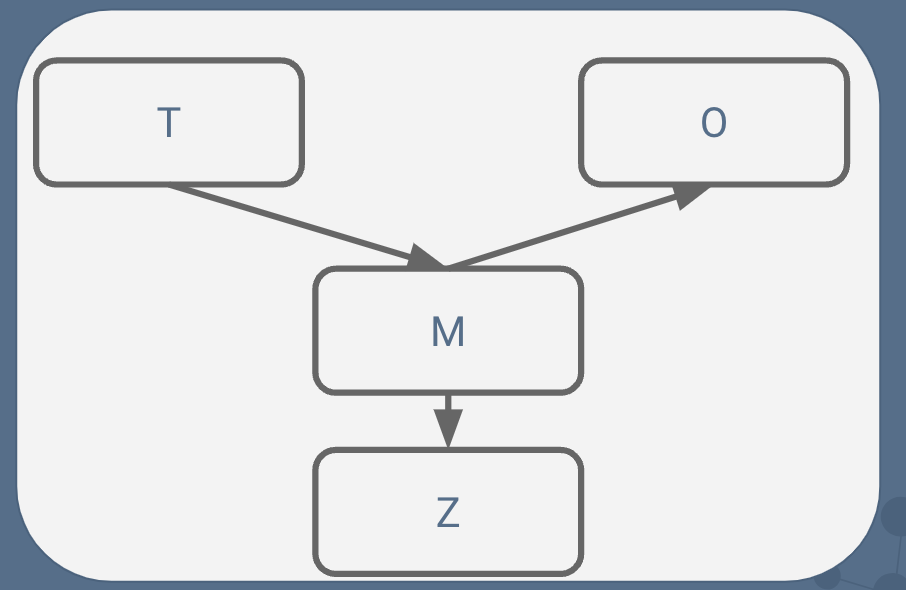

In [10]:
Image('graphs/graph4.png', width=500, height=300)

In [11]:
# T := B(0.8)
# M := B(0.6) T + B(0.2)(1-T)
# O := B(0.3) M + B(0.5) (1-M) + 𝜀
# Z := B(0.1) M + B(0.9)(1-M)

seed(42)
n = 10000



e = normal(0, 1, n)
treatment = binomial(1, 0.8, size=n)
M = binomial(1, 0.6, size=n)*treatment + binomial(1, 0.6, size=n)*(1-treatment)
z_var = binomial(1, 0.1, size=n)*M + binomial(1, 0.9, size=n)*(1-M)
outcome = binomial(1, 0.3, size=n)*M + binomial(1, 0.5, size=n)*(1-M) + e
df = pd.DataFrame({'M': M, 'treatment': treatment, 'Z':z_var, 'outcome': outcome})

condition_prob_diff = mean(outcome[treatment==1]) - mean(outcome[treatment==0])

# adjustment formula

p_z = np.array([mean(z_var==z) for z in np.unique(z_var)])
adjusted_formula_e0t1 = np.array([mean(outcome[(treatment==1) & (z_var==z)]) for z in np.unique(z_var)])
adjusted_formula_e0t0 = np.array([mean(outcome[(treatment==0) & (z_var==z)]) for z in np.unique(z_var)])

adjusted_formula = np.sum(p_z * (adjusted_formula_e0t1 - adjusted_formula_e0t0))

print(condition_prob_diff)
print(adjusted_formula)

display = pd.DataFrame({'Estimated E(O\|T=1) - E(O\|T=0) from data: ': condition_prob_diff,
'Adjustment(1) - Adjustment(0)': adjusted_formula,
'Theoretical ATE = E(O\|do(T=1)) - E(O\|do(T=0))': -0.08,
'Estimated ATE from data: ': condition_prob_diff}, index=['Value']).transpose()

display



0.06474840796309728
0.06474840796309728
0.06352714120454923


,Value
Estimated E(O\|T=1) - E(O\|T=0) from data:,0.064748
Adjustment(1) - Adjustment(0),0.063527
Theoretical ATE = E(O\|do(T=1)) - E(O\|do(T=0)),-0.080000
Estimated ATE from data:,0.064748


no need to adjust because Z is independent of T and O. 

## Part II

 Intervening variables are used to explain a causal path, while conditioning variables are used to control for potential confounders.

### Initial

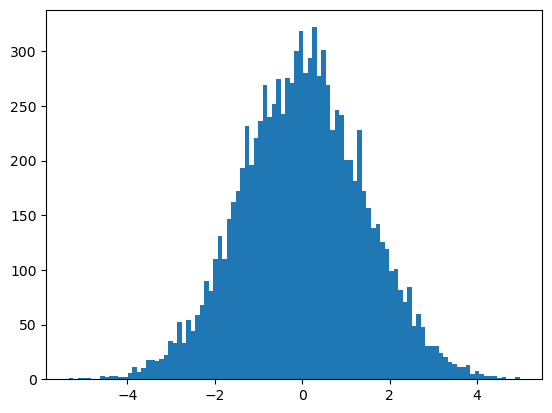

0.011398069696461042
1.4112319593153013


In [12]:
import matplotlib.pyplot as plt

seed(42)
n = 10000

e = normal(0, 1, n)
e2 = normal(0, 1, n)
C = e
E = C + e2

plt.hist(E, bins = 100)
plt.show()
print(mean(E))
print(np.std(E))

## (E | (C := 2))

E := N(C, 1) = N(2, 1)
simple intervention

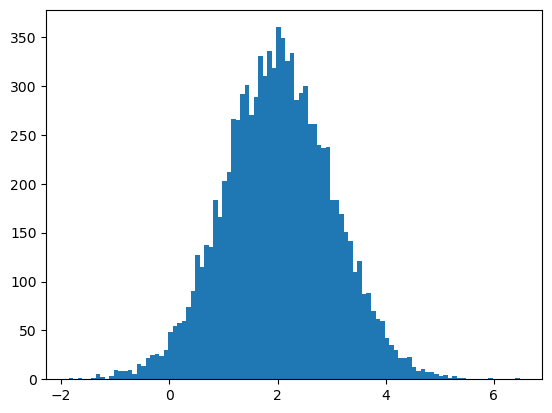

2.013534053064887
1.0009601997979969


In [13]:
seed(42)
n = 10000

e = normal(0, 1, n)
e2 = normal(0, 1, n)
C = 2
E = C + e2

plt.hist(E, bins = 100)
plt.show()
print(mean(E))
print(np.std(E))

## (E | C = 2)

simple conditioning

E[ E | C = 2 ] 

= E[ N(0, 1) + 2 ] 

= E[ N(0, 1)] + 2 

= 0 + 2 = 2

var is still εE = 1

E follows N(2, 1)

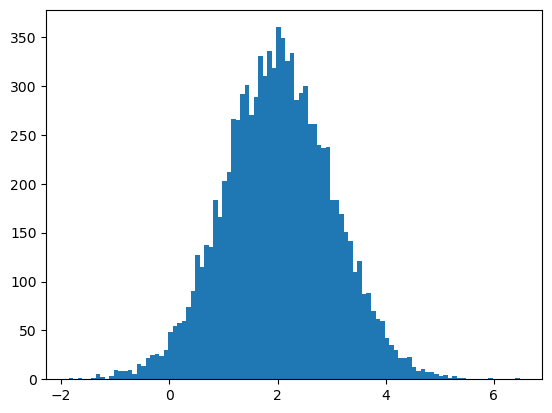

2.013534053064887
1.0009601997979969


In [14]:
seed(42)
n = 10000

e = normal(0, 1, n)
e2 = normal(0, 1, n)
C = e
E = 2 + e2

plt.hist(E, bins = 100)
plt.show()
print(mean(E))
print(np.std(E))

## (C | (E := 2))

If E := 2, the effect on C is irrelevant because C and E are independent.

C follows N(0, 1)


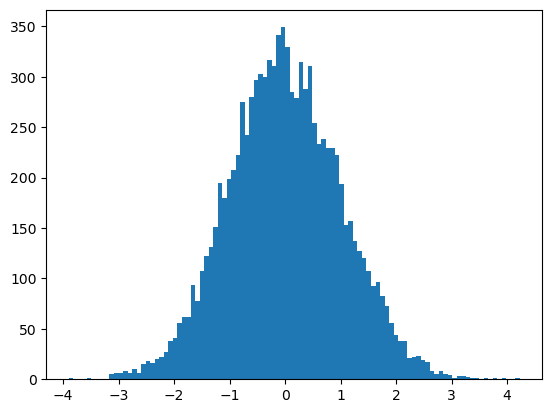

-0.0036040029257431066
1.00975884844798


In [15]:
seed(168)
n = 10000

e = normal(0, 1, n)
e2 = normal(0, 1, n)
C = e
E = 2

plt.hist(C, bins = 100)
plt.show()
print(mean(C))
print(np.std(C))

## (C | E = 2)

2 = C + epsilonE

2 = epsilonC + epsilonE

which means epsilonC and epsilonE must be inversely related centered about 2

E[ C | E = 2 ] 

= E[ 2 - N(0, 1) ] 

= E[ 2 ] + E[ (-1) * N(0, 1) ] 

= 2 + (-1) * E[ N(0, 1) ] 

= 2 - 0 = 2

Var[ C | E = 2 ] 

= Var[ 2 - N(0, 1) ] 

= Var[ 2 ] + Var[ (-1) * N(0, 1) ] 

= 0 + (-1)^2 * Var[ N(0, 1) ] 

= Var[ N(0, 1) ] = 1

C = N(2, 1)

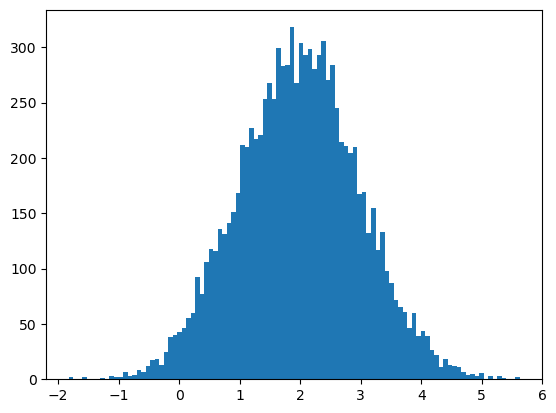

1.9800126373399871
0.9934070949511485


In [16]:
seed(168)
n = 10000

eC = normal(0, 1, n)
eE = normal(0, 1, n)
C = 2 - eE


plt.hist(C, bins = 100)
plt.show()
print(mean(C))
print(np.std(C))